<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-CarlosAlbertoNievesPerez/blob/main/Actividad_Semanal_7_Regresiones_y_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CARLOS ALBERTO NIEVES A01018796

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [ ]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [ ]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

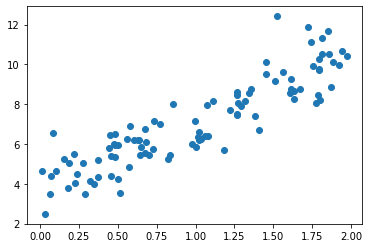

In [ ]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [ ]:
#X_fit[]

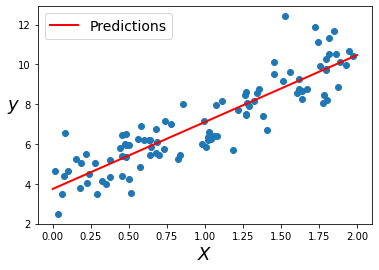

In [ ]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [ ]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [ ]:
X_new.shape

(2, 1)

In [ ]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [ ]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [ ]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

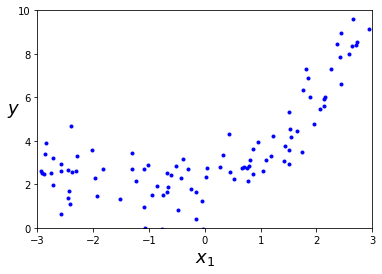

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [ ]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [ ]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [ ]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

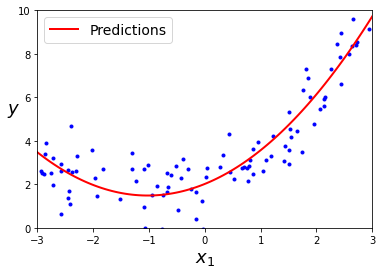

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [ ]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [ ]:
len(X)

1000

In [ ]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

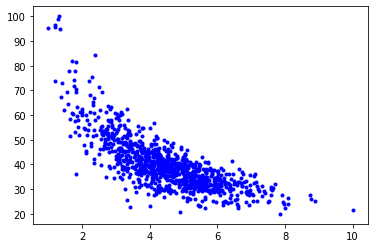

In [ ]:
plt.plot(X,y,'b.')

##DIVISION DE DATOS

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')
dicc_errores = {}

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 900
Tamaño de X_train: (900, 1)
**************************************************
Mumero total de registros en el test dataset: 100
Tamaño del X_test: (100, 1)


##LINEAL REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

##VISUALIZACIONES

###PREDICTION WITH TRAIN

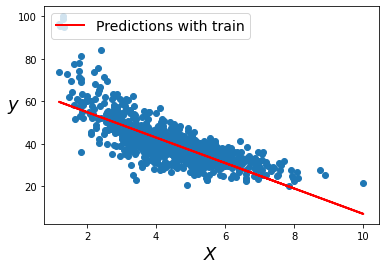

In [ ]:
yhat = linear_reg.predict(X_train)

plt.scatter(X_train, y_train)
plt.plot(X_train, yhat, "r-", linewidth=2, label="Predictions with train")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

###PREDICTION WITH TEST

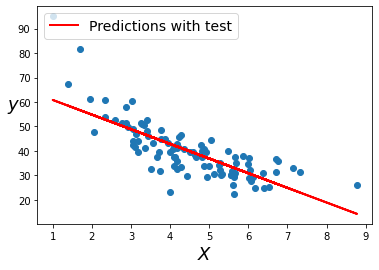

In [ ]:
yhat_test = linear_reg.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, yhat_test, "r-", linewidth=2, label="Predictions with test")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [ ]:
linear_reg.coef_, linear_reg.intercept_

(array([-5.98882699]), 66.83650741226988)

**YHAT=-5.9888X+66.836**

In [ ]:
yhat_test

array([39.33781957, 44.26058238, 49.66953663, 32.79171748, 47.10537261,
       37.98201755, 45.42071108, 36.22515778, 33.5758441 , 41.87191428,
       33.12946768, 23.05091467, 35.07429172, 43.20061834, 38.10564826,
       43.63593586, 49.2554343 , 44.21893763, 55.20004529, 44.83870093,
       30.76611387, 36.61690197, 33.17657165, 34.87833619, 35.29349453,
       46.36166153, 38.96677761, 52.82210512, 41.85260809, 35.26339328,
       54.54553752, 41.78713832, 48.57173789, 38.02261075, 42.41802969,
       28.59633034, 39.01614668, 48.54266737, 30.99728625, 48.69255853,
       41.67367994, 46.85384244, 24.04090657, 44.3749518 , 40.3026443 ,
       48.53462277, 14.24928761, 28.44909769, 37.36510679, 29.93817969,
       30.64777855, 27.71163587, 49.58572564, 41.81131528, 58.57765387,
       52.82625176, 41.24011095, 30.80081126, 48.25938282, 30.13464752,
       42.33522443, 51.3655144 , 33.060437  , 42.85495078, 35.37572884,
       47.40402361, 48.05704533, 30.41861982, 39.89906313, 33.51

##ERRORES Y R2

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, yhat_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yhat_test)))
print('r2_score',r2_score(y_test, yhat_test))

listErrors = list()
listErrors.append({"Model": "LinearRegression", 
                      "MAE":metrics.mean_absolute_error(y_test, yhat_test), 
                      "RMSE":np.sqrt(metrics.mean_squared_error(y_test, yhat_test)), 
                      "R2":r2_score(y_test, yhat_test)} )

Error medio Absoluto (MAE): 5.013587781954963
Root Mean Squared Error: 7.108963321847682
r2_score 0.6116251549562579


#POLINOMIAL

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

LinearRegression()

##VISUALIZACIONES

###PREDICTION WITH TRAIN

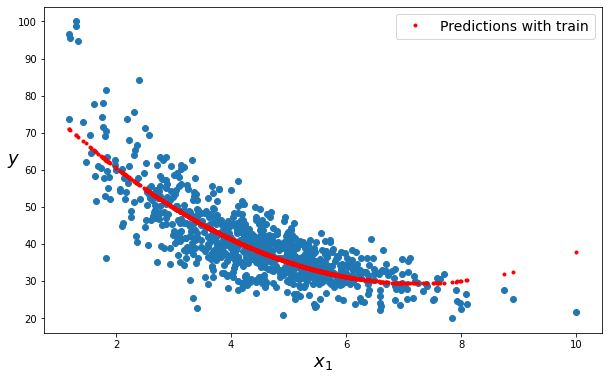

In [ ]:
X_train_poly = poly_features.transform(X_train)
yhat_poly = lin_reg.predict(X_train_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train)
plt.plot(X_train, yhat_poly, "r.",linewidth=2, label="Predictions with train")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)
plt.show()

###PREDICTION WITH TEST

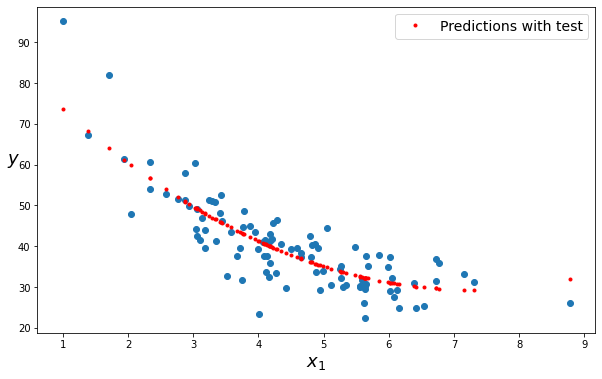

In [ ]:
X_test_poly = poly_features.transform(X_test)
yhat_poly = lin_reg.predict(X_test_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test)
plt.plot(X_test, yhat_poly, "r.",linewidth=2, label="Predictions with test")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)
plt.show()

In [ ]:
lin_reg.coef_, lin_reg.intercept_

(array([-16.40638102,   1.13136095]), 88.80179909112496)

**YHAT=-16.40638102X+1.13136095X^2+88.80179909**

##ERRORES Y R2

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, yhat_poly))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yhat_poly)))
print('r2_score',r2_score(y_test, yhat_poly))

listErrors.append({"Model": "Polynomial", 
                      "MAE":metrics.mean_absolute_error(y_test, yhat_poly), 
                      "RMSE":np.sqrt(metrics.mean_squared_error(y_test, yhat_poly)), 
                      "R2":r2_score(y_test, yhat_poly)} )

Error medio Absoluto (MAE): 4.3833025759681075
Root Mean Squared Error: 5.832771301068425
r2_score 0.7385501224942536


##RIDGE

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(fit_intercept=True)
ridge_reg.fit(X_train, y_train)

Ridge()

###Visualizacion

In [ ]:
###Train

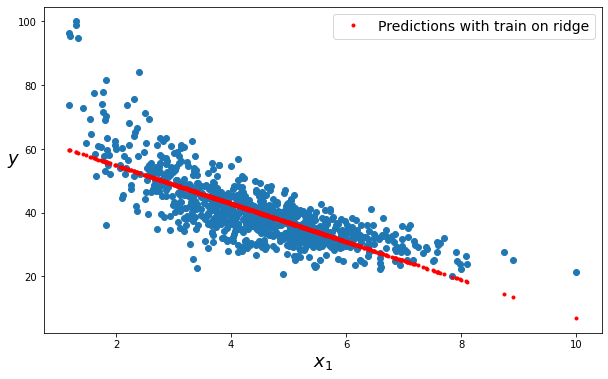

In [ ]:
#X_test_ridge = poly_features.transform(X_test)
y_hat_ridge = ridge_reg.predict(X_train)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train)
plt.plot(X_train, y_hat_ridge, "r.",linewidth=2, label="Predictions with train on ridge")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)
plt.show()

###Test

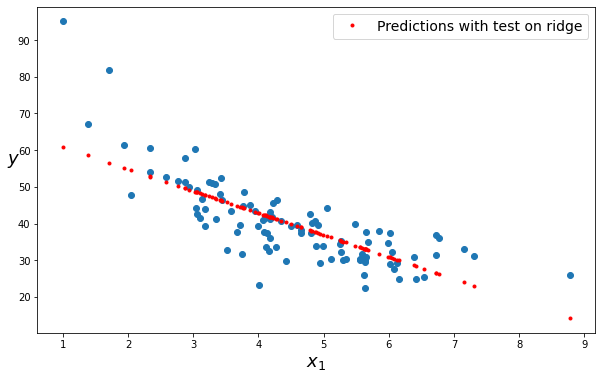

In [ ]:
#X_test_ridge = poly_features.transform(X_test)
y_hat_ridge = ridge_reg.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_hat_ridge, "r.",linewidth=2, label="Predictions with test on ridge")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)
plt.show()

In [ ]:
ridge_reg.coef_, ridge_reg.intercept_

(array([-5.98505893]), 66.81965008652344)

**YHAT= -5.98505893X + 66.819650086**

###Errores y R2

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_hat_ridge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_ridge)))
print('r2_score',r2_score(y_test, y_hat_ridge))
listErrors.append({"Model": "Ridge", 
                      "MAE":metrics.mean_absolute_error(y_test, y_hat_ridge), 
                      "RMSE":np.sqrt(metrics.mean_squared_error(y_test, y_hat_ridge)), 
                      "R2":r2_score(y_test, y_hat_ridge)} )

Error medio Absoluto (MAE): 5.014112691100099
Root Mean Squared Error: 7.10938640108989
r2_score 0.611578926493084


##LASSO

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(fit_intercept=True)
lasso_reg.fit(X_train, y_train)

Lasso()

###Visualizacion

####TRAIN

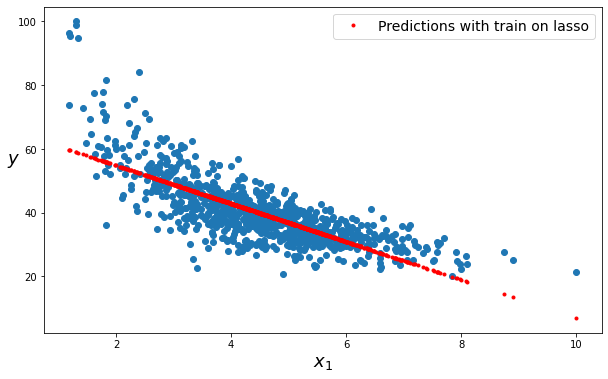

In [ ]:
#X_test_ridge = poly_features.transform(X_test)
y_hat_lasso = ridge_reg.predict(X_train)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train)
plt.plot(X_train, y_hat_lasso, "r.",linewidth=2, label="Predictions with train on lasso")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)
plt.show()

In [ ]:
####TEST

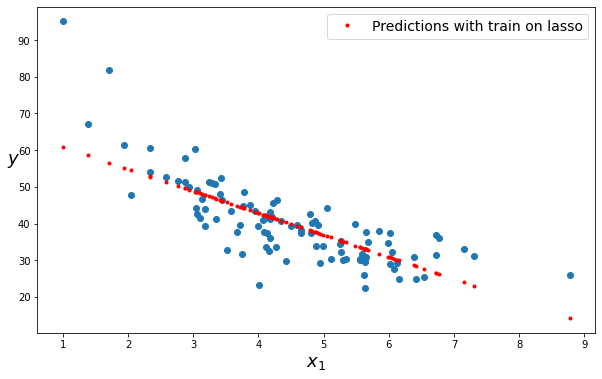

In [ ]:
y_hat_lasso = ridge_reg.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_hat_lasso, "r.",linewidth=2, label="Predictions with train on lasso")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)
plt.show()

In [ ]:
lasso_reg.coef_, lasso_reg.intercept_

(array([-5.42220651]), 64.30159616857074)

**YHAT= -5.42220651X+64.3015961685**

####ERRORES Y R2

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_hat_lasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_lasso)))
print('r2_score',r2_score(y_test, y_hat_lasso))
listErrors.append({"Model": "Lasso", 
                      "MAE":metrics.mean_absolute_error(y_test, y_hat_lasso), 
                      "RMSE":np.sqrt(metrics.mean_squared_error(y_test, y_hat_lasso)), 
                      "R2":r2_score(y_test, y_hat_lasso)} )

Error medio Absoluto (MAE): 5.014112691100099
Root Mean Squared Error: 7.10938640108989
r2_score 0.611578926493084


##GRAFICO

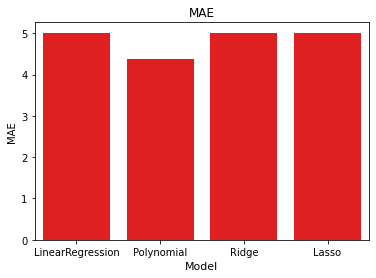

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_listErrors = pd.DataFrame(listErrors)
sns.barplot(data=df_listErrors, x='Model', y='MAE',  color = 'Red').set(title="MAE")
plt.xlabel('Model', fontsize=11)
plt.show()

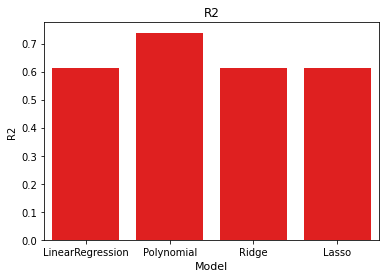

In [ ]:
df_listErrors = pd.DataFrame(listErrors)
sns.barplot(data=df_listErrors, x='Model', y='R2',  color = 'Red').set(title="R2")
plt.xlabel('Model', fontsize=11)
plt.show()

El modelo que explica la mayor variabilidad fue el polinomial a traves del R2 con un 70% aproximadamente, lo cual no es lo mejor pero fue el que tenia el mayor porcentaje de explicacion.



#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


##Descripcion de informacion

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


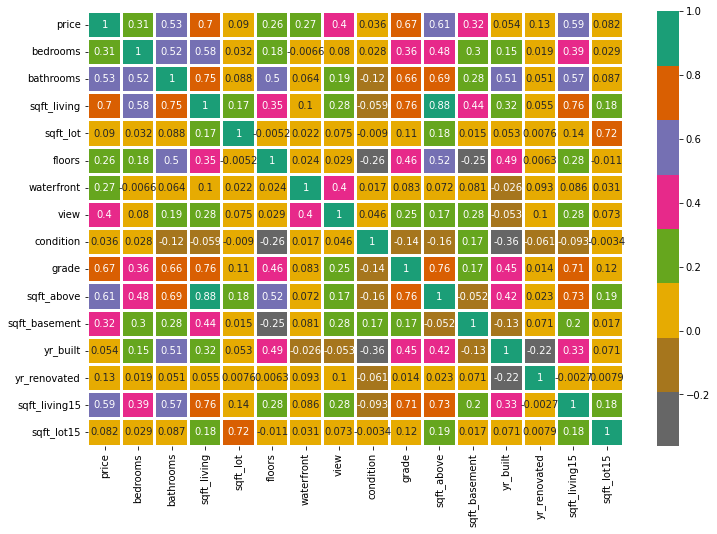

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

##Division de datos (SPLIT)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


##MLR Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

multi_linear_reg = LinearRegression(fit_intercept=True)
multi_linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
multi_linear_reg.coef_, multi_linear_reg.intercept_

(array([[-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,
          1.71356997e-02,  3.16916913e+04,  5.52691023e+05,
          4.12493228e+04,  2.12221443e+04,  1.19493216e+05,
          4.77750272e+01,  6.02175566e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]]),
 array([6151359.26274124]))

**YHAT= -3.82008048*10^04X1 + 4.14661380*10^04X2 + 1.07992584*10^02X3 + 1.71356997*10^-02X4 + 3.16916913*10^04X5 +5.52691023*10^05X6...**

##ERRORES Y R2

In [ ]:
yhat_multi_linear_reg = multi_linear_reg.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, yhat_multi_linear_reg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yhat_multi_linear_reg)))
print('r2_score',r2_score(y_test, yhat_multi_linear_reg))

listErrors = list()
listErrors.append({"Model": "MultipleLinearRegression", 
                      "MAE":metrics.mean_absolute_error(y_test, yhat_multi_linear_reg), 
                      "RMSE":np.sqrt(metrics.mean_squared_error(y_test, yhat_multi_linear_reg)), 
                      "R2":r2_score(y_test, yhat_multi_linear_reg)} )

Error medio Absoluto (MAE): 137480.13882733323
Root Mean Squared Error: 232133.3676240722
r2_score 0.6579723205007892


##Regresion polinomial multiple

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)

In [ ]:
multi_poly_reg = LinearRegression()
multi_poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
multi_poly_reg.coef_, multi_poly_reg.intercept_

(array([[ 9.33879687e+05, -1.09273860e+06, -5.37390428e+02,
         -2.78634102e+01, -2.07489950e+06, -3.95371495e+06,
         -2.88652531e+05,  5.58519576e+05,  1.09862983e+06,
         -1.38818478e+02, -3.01577501e+02, -8.59702783e+04,
         -2.95366775e+03,  3.99963414e+03, -3.40100355e+01,
          9.57586804e+02,  7.49940820e+03, -1.40076562e+01,
         -1.85239669e-02,  8.58010319e+03, -1.14952153e+04,
         -3.08060610e+02, -5.24565914e+03, -5.36863409e+03,
         -9.99978948e-01, -1.43956003e+01, -4.67077597e+02,
         -9.13138297e+00,  1.72800783e+01,  2.15615872e-01,
         -9.63204388e+03,  1.52795786e+01, -1.35647630e-01,
         -2.59102127e+04,  4.33756643e+04,  3.82989181e+03,
         -1.08068921e+03,  2.22968388e+04,  1.45391755e+01,
          1.44644985e+00,  5.03114428e+02, -1.70846902e+01,
         -1.72874570e+01, -5.60714143e-02, -4.03248131e+00,
         -5.41426547e+00,  4.83377617e+00,  1.60300670e+02,
         -1.42705827e+01,  1.31213999e+0

##ERRORES Y R2

In [ ]:
X_test_poly = poly_features.transform(X_test)
yhat_multi_poly_reg = multi_poly_reg.predict(X_test_poly)

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, yhat_multi_poly_reg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yhat_multi_poly_reg)))
print('r2_score',r2_score(y_test, yhat_multi_poly_reg))
listErrors.append({"Model": "Multiple Poolynomial Regression", 
                      "MAE":metrics.mean_absolute_error(y_test, yhat_multi_poly_reg), 
                      "RMSE":np.sqrt(metrics.mean_squared_error(y_test, yhat_multi_poly_reg)), 
                      "R2":r2_score(y_test, yhat_multi_poly_reg)} )

Error medio Absoluto (MAE): 121313.84710967973
Root Mean Squared Error: 186261.48278206724
r2_score 0.7797924413783968


##Ridge

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(fit_intercept=True)
ridge_reg.fit(X_train, y_train)

Ridge()

In [ ]:
ridge_reg.coef_, ridge_reg.intercept_

(array([[-3.82192265e+04,  4.14509656e+04,  1.08013356e+02,
          1.69318239e-02,  3.16891574e+04,  5.48258333e+05,
          4.14559235e+04,  2.12264347e+04,  1.19470568e+05,
          4.78072834e+01,  6.02071561e+01, -3.55050129e+03,
          1.33171890e+01,  2.89851987e+01, -5.47998512e-01]]),
 array([6150751.38368669]))

###ERRORES Y R2

In [ ]:
yhat_Ridge_reg = ridge_reg.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, yhat_Ridge_reg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yhat_Ridge_reg)))
print('r2_score',r2_score(y_test, yhat_Ridge_reg))
listErrors.append({"Model": "Ridge Regression", 
                      "MAE":metrics.mean_absolute_error(y_test, yhat_Ridge_reg), 
                      "RMSE":np.sqrt(metrics.mean_squared_error(y_test, yhat_Ridge_reg)), 
                      "R2":r2_score(y_test, yhat_Ridge_reg)} )

Error medio Absoluto (MAE): 137491.0433940327
Root Mean Squared Error: 232165.24266477543
r2_score 0.6578783840295005


##LASSO

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(fit_intercept=True)
lasso_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso()

In [ ]:
lasso_reg.coef_, lasso_reg.intercept_

(array([-3.81995345e+04,  4.14618568e+04,  2.93480482e+02,  1.71281822e-02,
         3.16871411e+04,  5.52541108e+05,  4.12549654e+04,  2.12193902e+04,
         1.19491837e+05, -1.37708200e+02, -1.25268449e+02, -3.55085005e+03,
         1.32628460e+01,  2.90053298e+01, -5.48136075e-01]),
 array([6151280.11390041]))

###ERRORES Y R2

In [ ]:
yhat_Lasso_reg = lasso_reg.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, yhat_Lasso_reg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yhat_Lasso_reg)))
print('r2_score',r2_score(y_test, yhat_Lasso_reg))
listErrors.append({"Model": "Lasso Regression", 
                      "MAE":metrics.mean_absolute_error(y_test, yhat_Lasso_reg), 
                      "RMSE":np.sqrt(metrics.mean_squared_error(y_test, yhat_Lasso_reg)), 
                      "R2":r2_score(y_test, yhat_Lasso_reg)} )

Error medio Absoluto (MAE): 137480.57154885167
Root Mean Squared Error: 232134.52753802197
r2_score 0.6579689024340816


##GRAFICOS

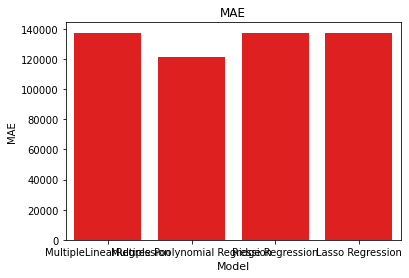

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_listErrors = pd.DataFrame(listErrors)
sns.barplot(data=df_listErrors, x='Model', y='MAE',  color = 'Red').set(title="MAE")
plt.xlabel('Model', fontsize=11)
plt.show()

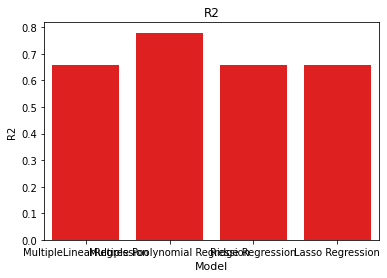

In [ ]:
df_listErrors = pd.DataFrame(listErrors)
sns.barplot(data=df_listErrors, x='Model', y='R2',  color = 'Red').set(title="R2")
plt.xlabel('Model', fontsize=11)
plt.show()

El porcentaje mayor de explicacion de la variabilidad fue de arriba de 75% a traves de R2 sin embargo igual que lo mencionado en el ejercicio uno, no es el mejor resultado deseado